In [1]:
'''
Tasks: 
HACER ALGUN CLASSIFICATION POR DAY OF WEEK 
TIPO QUE CRIMENES PUEDEN PASAR TAL DIA ;) este es buenardo

    preapre dataframes for classification based on the preprocessing and analysis ipynb
    preprocess data 
    prepare training and testing sets
    train and test models
    Models:
        K-NN
        SVM 
        K-Means 
        Linear Regression
        Decision Tress and Random Forest
    performance metrics   
'''

'\nTasks: \nHACER ALGUN CLASSIFICATION POR DAY OF WEEK \nTIPO QUE CRIMENES PUEDEN PASAR TAL DIA ;) este es buenardo\n\n    preapre dataframes for classification based on the preprocessing and analysis ipynb\n    preprocess data \n    prepare training and testing sets\n    train and test models\n    Models:\n        K-NN\n        SVM \n        K-Means \n        Linear Regression\n        Decision Tress and Random Forest\n    performance metrics   \n'

In [2]:
# Data, Datasets & Utils
import pandas as pd
from pandas.plotting import scatter_matrix
import pprint
import numpy as np
from time import time
from numpy import log2 as log

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plot 
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz


In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import defaultdict
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.model_selection import cross_val_predict
from collections import Counter

In [5]:
#loading data file
df_sf = pd.read_csv('Datasets\Police_Department_Incidents.csv')

In [6]:
#preprocessing
#handling unique missing value by dropping it
df_sf = df_sf.dropna()
df_sf.isnull().sum() 

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [7]:
df_sf.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [8]:
'''
Category
Classese 1: 10000 onwards

LARCENY/THEFT          40408 - 1
OTHER OFFENSES         19599 - 2
NON-CRIMINAL           17866 - 3 
ASSAULT                13577 - 4 

District
Classes 1: 
SOUTHERN      28445  - 0 
NORTHERN      20100  - 1 

'''

'\nCategory\nClassese 1: 10000 onwards\n\nLARCENY/THEFT          40408 - 1\nOTHER OFFENSES         19599 - 2\nNON-CRIMINAL           17866 - 3 \nASSAULT                13577 - 4 \n\nDistrict\nClasses 1: \nSOUTHERN      28445  - 0 \nNORTHERN      20100  - 1 \n\n'

In [9]:
#getting the cooridantes features ready for train test/split 
#df_corr set will contain the feature X,Y and District
df_coor = df_sf.drop(columns=['IncidntNum'])
df_coor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150499 entries, 0 to 150499
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    150499 non-null  object 
 1   Descript    150499 non-null  object 
 2   DayOfWeek   150499 non-null  object 
 3   Date        150499 non-null  object 
 4   Time        150499 non-null  object 
 5   PdDistrict  150499 non-null  object 
 6   Resolution  150499 non-null  object 
 7   Address     150499 non-null  object 
 8   X           150499 non-null  float64
 9   Y           150499 non-null  float64
 10  Location    150499 non-null  object 
 11  PdId        150499 non-null  float64
dtypes: float64(3), object(9)
memory usage: 14.9+ MB


In [10]:
#selecting object values to tranform into int 
sel = df_coor.select_dtypes(exclude=['float64']).columns 
sel 

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'Location'],
      dtype='object')

In [11]:
#encoding objects
encode = defaultdict(preprocessing.LabelEncoder)
df_coor[sel] = df_coor[sel].apply(lambda x: encode[x.name].fit_transform(x.astype(str)))

In [12]:
df_coor

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,38,468,0,21,119,7,0,9418,-122.403405,37.775421,12617,1.200580e+13
1,38,298,0,21,119,7,0,9418,-122.403405,37.775421,12617,1.200580e+13
2,37,715,1,200,358,0,0,12994,-122.388856,37.729981,3254,1.410590e+13
3,20,387,5,26,949,9,9,12883,-122.412971,37.785788,15446,1.600140e+13
4,20,387,0,0,29,3,9,3560,-122.419672,37.765050,10437,1.600030e+13
...,...,...,...,...,...,...,...,...,...,...,...,...
150495,1,102,0,115,780,5,9,14126,-122.453982,37.771428,11568,1.610610e+13
150496,20,387,0,115,1319,1,9,12760,-122.401857,37.796626,17770,1.760010e+13
150497,16,454,4,113,719,1,9,14502,-122.412269,37.790673,16685,1.760010e+13
150498,16,336,0,115,59,1,9,4752,-122.406659,37.788275,16151,1.760010e+13


In [13]:
df_coor.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [14]:
df_coor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150499 entries, 0 to 150499
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    150499 non-null  int32  
 1   Descript    150499 non-null  int32  
 2   DayOfWeek   150499 non-null  int32  
 3   Date        150499 non-null  int32  
 4   Time        150499 non-null  int32  
 5   PdDistrict  150499 non-null  int32  
 6   Resolution  150499 non-null  int32  
 7   Address     150499 non-null  int32  
 8   X           150499 non-null  float64
 9   Y           150499 non-null  float64
 10  Location    150499 non-null  int32  
 11  PdId        150499 non-null  float64
dtypes: float64(3), int32(9)
memory usage: 9.8 MB


In [15]:
# outliers dropped
df_coor.drop(df_sf[df_sf['Y'] == df_sf['Y'].max()].index, inplace=True)
df_coor.drop(df_sf[df_sf['X'] == df_sf['X'].max()].index, inplace=True)

In [16]:
df_coor['PdDistrict'].value_counts()

7    28201
4    20100
3    19503
1    17666
0    14303
2    11594
8    11325
9     9942
6     8918
5     8699
Name: PdDistrict, dtype: int64

In [17]:
#separating the class from the 
X = df_coor[['Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
             'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId']]
y = df_coor['PdDistrict']

In [18]:
''' it is now determined the number of classes in the pdDistricts are

    class : number of class
    n : how many more exmaples
    and the percetange in the dataset as a whole
    
    
    class 1: could work with 3,4
    class 2: could work with 8, 9
    class 3: could work with 4,1
    class 4: could work with 3,1 
    class 5: could work with 6, 9
    class 6: could work with 5, 9
    class 7: massive unbalance - not working mate
    class 8: could work with 2, 9
'''

' it is now determined the number of classes in the pdDistricts are\n\n    class : number of class\n    n : how many more exmaples\n    and the percetange in the dataset as a whole\n    \n    \n    class 1: could work with 3,4\n    class 2: could work with 8, 9\n    class 3: could work with 4,1\n    class 4: could work with 3,1 \n    class 5: could work with 6, 9\n    class 6: could work with 5, 9\n    class 7: massive unbalance - not working mate\n    class 8: could work with 2, 9\n'

Class=7, n=28201 (18.769%)
Class=0, n=14303 (9.519%)
Class=9, n=9942 (6.617%)
Class=3, n=19503 (12.980%)
Class=4, n=20100 (13.378%)
Class=8, n=11325 (7.537%)
Class=2, n=11594 (7.716%)
Class=1, n=17666 (11.758%)
Class=6, n=8918 (5.935%)
Class=5, n=8699 (5.790%)


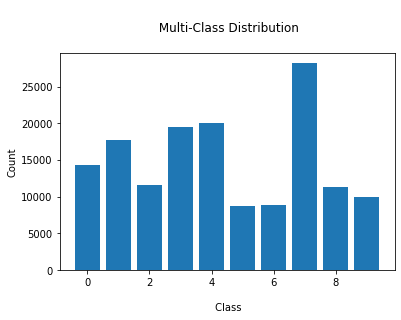

In [22]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.title("\n Multi-Class Distribution\n")
plt.xlabel("\n Class")
plt.ylabel("Count") 
plt.bar(counter.keys(), counter.values())
plt.show()

In [23]:
%%time
#por ahi hcer un k-means de esto en vez de knn (:
#K-Nearest Neighbor attempt 1 to predict classify district by coordenates and category
predicting_district = KNeighborsClassifier(n_neighbors=8)
predicting_district.fit(X, y)

#rkf = RepeatedStratifiedKFold(n_splits=4, random_state=42)
scores = cross_validate(predicting_district, X, y, cv=6, return_train_score=True, return_estimator=True)
y_pred = cross_val_predict(predicting_district, X, y, cv=3)

# Printing results
pprint.pprint(scores)
print()
print('\n')
print("Accuracy (Training): %0.2f (+/- %0.2f)" % (scores['train_score'].mean(), scores['train_score'].std() * 2))
print('\n')
print("Accuracy (Testing):  %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))
print('\n')
kung_fu_sion = confusion_matrix(y, y_pred)
print(kung_fu_sion)
report = classification_report(y, y_pred)
print('\n')
print(report)

{'estimator': [KNeighborsClassifier(n_neighbors=10),
               KNeighborsClassifier(n_neighbors=10),
               KNeighborsClassifier(n_neighbors=10),
               KNeighborsClassifier(n_neighbors=10),
               KNeighborsClassifier(n_neighbors=10),
               KNeighborsClassifier(n_neighbors=10)],
 'fit_time': array([0.5840857 , 0.60989761, 0.5933845 , 0.59735036, 0.71391916,
       1.0163331 ]),
 'score_time': array([0.78051901, 0.79538536, 0.78598189, 0.84430099, 0.83324194,
       1.54529715]),
 'test_score': array([0.3579187 , 0.31846498, 0.13537257, 0.08437824, 0.12862391,
       0.29435725]),
 'train_score': array([0.5947975 , 0.59687403, 0.6055635 , 0.60972454, 0.60016452,
       0.59531188])}



Accuracy (Training): 0.60 (+/- 0.01)


Accuracy (Testing):  0.22 (+/- 0.21)


[[2650  658 1649 3235 1312  348  313 2340 1259  539]
 [ 381 4049  226 1563 2998  444  609 4463  197 2736]
 [2397  438 1718 2218 1023  219  228 1735 1319  299]
 [1830  834  703 6757 2087  96

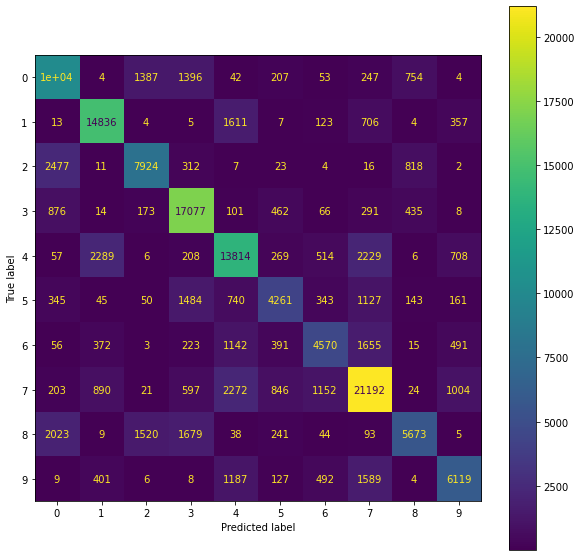

In [21]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(predicting_district, X, y, ax=ax)
plt.show()

In [22]:
#all this is now to compare performance btw... 

In [23]:
#decision tree 

In [24]:
%%time
dt_pred_distr = DecisionTreeClassifier()
dt_pred_distr.fit(X,y)
#rkf = RepeatedStratifiedKFold(n_splits=4,  n_repeats=2)
scores = cross_validate(dt_pred_distr, X, y, cv=4, return_train_score=True, return_estimator=True)
dt_y_pred = cross_val_predict(dt_pred_distr, X, y, cv=3)

pprint.pprint(scores)
print()
print('\n')
print("Accuracy (Training): %0.2f (+/- %0.2f)" % (scores['train_score'].mean(), scores['train_score'].std() * 2))
print('\n')
print("Accuracy (Testing):  %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))
print('\n')
print(confusion_matrix(y, dt_y_pred))
print('\n')
report = classification_report(y, dt_y_pred)
print(report)

{'estimator': [DecisionTreeClassifier(),
               DecisionTreeClassifier(),
               DecisionTreeClassifier(),
               DecisionTreeClassifier()],
 'fit_time': array([0.68417048, 0.64829683, 0.67822623, 0.66219091]),
 'score_time': array([0.01097083, 0.01296473, 0.01093197, 0.0119679 ]),
 'test_score': array([0.98437292, 0.98589037, 0.98517158, 0.98482509]),
 'train_score': array([0.99999113, 0.99999113, 0.99999113, 1.        ])}



Accuracy (Training): 1.00 (+/- 0.00)


Accuracy (Testing):  0.99 (+/- 0.00)


[[14182     0    71     2     0     1     5    39     2     1]
 [    0 17281     0     0   157     0     0   133     0    95]
 [   73     0 11432    29     0    11     0     0    49     0]
 [   13     0    28 19168    17   144     0   132     1     0]
 [    0    98     0    22 19734     3    11    54     0   178]
 [    1     0     9    79     6  8540    54     2     8     0]
 [   16     0     0     0    10    32  8832     0    28     0]
 [   41    85     0    88 

In [50]:
#random forest

In [25]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf_pred_distr = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pred_distr.fit(X,y)
rkf = RepeatedStratifiedKFold(n_splits=4,  n_repeats=2)
scores = cross_validate(rf_pred_distr, X, y, cv=rkf, return_train_score=True, return_estimator=True)
rf_y_pred = cross_val_predict(rf_pred_distr, X, y, cv=3)

pprint.pprint(scores)
print()
print('\n')
print("Accuracy (Training): %0.2f (+/- %0.2f)" % (scores['train_score'].mean(), scores['train_score'].std() * 2))
print('\n')
print("Accuracy (Testing):  %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))
print('\n')
print(confusion_matrix(y, rf_y_pred))
print('\n')
report = classification_report(y, rf_y_pred)
print(report)

{'estimator': [RandomForestClassifier(random_state=42),
               RandomForestClassifier(random_state=42),
               RandomForestClassifier(random_state=42),
               RandomForestClassifier(random_state=42),
               RandomForestClassifier(random_state=42),
               RandomForestClassifier(random_state=42),
               RandomForestClassifier(random_state=42),
               RandomForestClassifier(random_state=42)],
 'fit_time': array([17.74950576, 17.09434175, 17.08134174, 17.12920761, 17.00553584,
       17.10327482, 16.96764827, 17.02548432]),
 'score_time': array([0.80786657, 0.78186512, 0.78486037, 0.79782677, 0.78486419,
       0.78191018, 0.81281376, 0.78789043]),
 'test_score': array([0.99105503, 0.99094854, 0.99153422, 0.99006975, 0.99092192,
       0.99097516, 0.99046934, 0.99156062]),
 'train_score': array([1.        , 1.        , 0.99999113, 0.99999113, 1.        ,
       1.        , 0.99999113, 0.99999113])}



Accuracy (Training): 1.00 (+/- 0.